In [1]:
#Librerias
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

pd.options.display.max_columns = None

In [2]:
#Llamamos al dataset 
df = pd.read_csv("D:\MiniProyectos_Python\HR_Prediccion_Analisis\dataset\IBMHR.csv")
df.shape

(1470, 35)

In [3]:
#Seleccionar 5 filas aleatorias para ver que tipo de información contienen
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1410,40,No,Travel_Rarely,444,Sales,2,2,Marketing,1,1986,2,Female,92,3,2,Sales Executive,2,Married,5677,4258,3,Y,No,14,3,3,80,1,15,4,3,11,8,5,10
276,35,No,Travel_Rarely,1315,Research & Development,22,3,Life Sciences,1,381,2,Female,71,4,3,Manager,2,Divorced,11996,19100,7,Y,No,18,3,2,80,1,10,6,2,7,7,6,2
1415,33,No,Non-Travel,1313,Research & Development,1,2,Medical,1,1994,2,Male,59,2,1,Laboratory Technician,3,Divorced,2008,20439,1,Y,No,12,3,3,80,3,1,2,2,1,1,0,0
160,22,No,Travel_Rarely,1256,Research & Development,19,1,Medical,1,217,3,Male,80,3,1,Research Scientist,4,Married,2323,11992,1,Y,No,24,4,1,80,2,2,6,3,2,2,2,2
1096,40,No,Travel_Rarely,898,Human Resources,6,2,Medical,1,1550,3,Male,38,3,4,Manager,4,Single,16437,17381,1,Y,Yes,21,4,4,80,0,21,2,3,21,7,7,7


In [4]:
#Mostrar valores únicos de cada columna
df.apply(lambda x: pd.Series(pd.unique(x))).fillna('').head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Other,,2,3,Male,61,2,1,Research Scientist,2,Married,5130,24907,1,,No,23,4,4,,1,10,3,3,10,7,1,7
2,37,,Non-Travel,1373,Human Resources,2,4,Medical,,4,4,,92,4,3,Laboratory Technician,3,Divorced,2090,2396,6,,,15,,2,,3,7,2,2,0,0,3,0
3,33,,,1392,,3,3,Marketing,,5,1,,56,1,4,Manufacturing Director,1,,2909,23159,9,,,12,,3,,2,6,5,4,8,2,2,2
4,27,,,591,,24,5,Technical Degree,,7,,,40,,5,Healthcare Representative,,,3468,16632,0,,,13,,,,,12,1,,2,5,7,6
5,32,,,1005,,23,,Human Resources,,8,,,79,,,Manager,,,3068,11864,4,,,20,,,,,1,4,,7,9,4,8
6,59,,,1324,,27,,,,10,,,81,,,Sales Representative,,,2670,9964,5,,,22,,,,,17,6,,1,8,8,3
7,30,,,1358,,16,,,,11,,,67,,,Research Director,,,2693,13335,2,,,21,,,,,5,,,9,3,6,11
8,38,,,216,,15,,,,12,,,44,,,Human Resources,,,9526,8787,7,,,17,,,,,3,,,5,6,5,17
9,36,,,1299,,26,,,,13,,,84,,,,,,5237,16577,3,,,14,,,,,31,,,4,13,15,1


__Con los valores únicos de cada columna se comprueban sus niveles, se pueden descartar las siguientes columnas:__

    EmployeeCount
    Over18
    StandardHours
__Pues poseen el mismo valor en todo el dataset. No aportan información.__

In [5]:
#Eliminar columnas innecesarias
df1 = df.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)
df1.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5


In [6]:
#Estadísticos descriptivos 
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


__Con el estadístico "count" se comprueba que no hay valores Na en el dataset.__

__Además indica el número de trabajadores en el data set: 1470.__

__Aunque en la columna "EmployeNumber" se observa que el mayor numero es 2068. Tal vez en la base de datos no se encuentren todos los trabajadores__

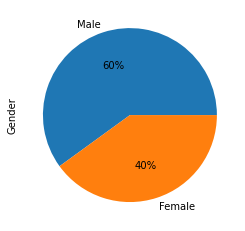

In [7]:
#Sexo
Gender = df1["Gender"]
Gender.value_counts().plot.pie(autopct='%1.0f%%')

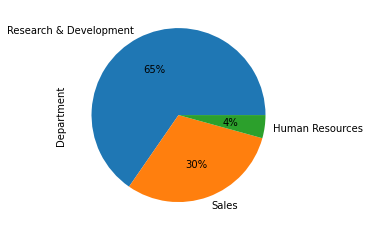

In [8]:
#Empleados por departamento
Department= df1["Department"]
Department.value_counts().plot.pie(autopct='%1.0f%%')

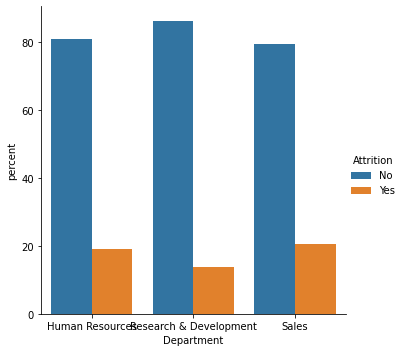

In [9]:
#Porcentajes para de baja laboral por cada departamento
x,y = 'Department', 'Attrition'
df1.groupby(x)[y].value_counts(normalize=True).mul(100)\
.rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')